In [120]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

from scipy.interpolate import interp1d

In [121]:
data=pd.read_csv('sdsc.csv',index_col='Time')

In [122]:
#plt.plot(np.array(data[0]),np.array(data[1]))

test t=0 cnt=1 
predicted=0.211990, expected=0.359223
test t=1 cnt=2 
predicted=0.162668, expected=0.417476
test t=2 cnt=3 
predicted=0.262153, expected=0.184466
test t=3 cnt=4 
predicted=0.201177, expected=0.281553
test t=4 cnt=5 
predicted=0.225284, expected=0.281553
test t=5 cnt=6 
predicted=0.182352, expected=0.330097
test t=6 cnt=7 
predicted=0.166216, expected=0.194175
test t=7 cnt=8 
predicted=0.283752, expected=0.300971
test t=8 cnt=9 
predicted=0.246045, expected=0.621359
test t=9 cnt=1 
predicted=0.318787, expected=0.485437
test t=10 cnt=2 
predicted=0.376260, expected=0.281553
test t=11 cnt=3 
predicted=0.155357, expected=0.184466
test t=12 cnt=4 
predicted=0.249721, expected=0.203883
test t=13 cnt=5 
predicted=0.244701, expected=0.330097
test t=14 cnt=6 
predicted=0.289148, expected=0.155340
test t=15 cnt=7 
predicted=0.156507, expected=0.097087
test t=16 cnt=8 
predicted=0.264334, expected=0.184466
test t=17 cnt=9 
predicted=0.585851, expected=0.475728
test t=18 cnt=1 
pre

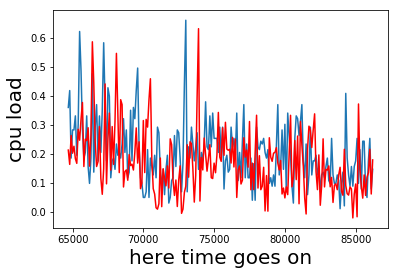

Test MSE: 0.022, RMSE: 0.147


In [123]:
X = data.values
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

slot=9

def difference(dataset, interval=slot):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - slot]
		diff.append(value)
	return np.array(diff)

def inverse_difference(history, yhat, interval=slot):
	return yhat + history[-interval]


differenced=difference(X)


t=0
while t<len(test):
    model = ARIMA(differenced, order=(5,1,0))
    model_fit = model.fit(disp=0)
    forecast = model_fit.forecast(steps=slot)[0]
#    for cnt in range(0,15):
    min=1
    for yhat in forecast:
        inverted = inverse_difference(history, yhat)
        print("test t=%d cnt=%d " % (t,min))
#        output = model_fit.forecast()
#        yhat=output[0]
        predictions.append(inverted)
        obs=test[t]
#        history.append(obs)
        history.append(obs)
        print('predicted=%f, expected=%f' % (inverted, obs))
        min+=1
        t+=1
        if(t==len(test)):
            break

fig, ax = pyplot.subplots(1)
pyplot.plot(data.index.values[size:len(X)],test)
pyplot.plot(data.index.values[size:len(X)],predictions, color='red')
#fig.autofmt_xdate()
pyplot.xlabel('here time goes on',fontsize=20)
pyplot.ylabel('cpu load',fontsize=20)
pyplot.legend()
pyplot.show()


error = mean_squared_error(test, predictions)
mse = sqrt(error)
print('Test MSE: %.3f, RMSE: %.3f' % (error,mse))


In [165]:
data

,Load
Time,
0,0.252427
100,0.145631
200,0.252427
300,0.242718
400,0.029126
500,0.165049
600,0.058252
700,0.097087
800,0.155340


In [164]:
interpolate_data = pd.DataFrame(columns=['Time(sec)','Load'])
for i in range(0,86300,60):
    interpolate_data = interpolate_data.append({'Time(sec)':i ,'Load':f(i)},ignore_index=True)
interpolate_data

,Time(sec),Load
0,0,0.252427184466
1,60,0.188349514563
2,120,0.166990291262
3,180,0.231067961165
4,240,0.2485436893204
5,300,0.242718446602
6,360,0.11456310679612
7,420,0.05631067961156
8,480,0.13786407766964
9,540,0.1223300970872
